## Homework #19 - Memory Optimization. Dask

### Overview:
The process of training a model can be challenging and both computation and memory intensive.
Dask is one of the solutions to handle the issue of
memory limitations in the case of working with a large amount of data.

### Task:
For this chapter, you will have to do the following:
* Import one of the datasets above as a Dask object and set the
number of partitions;
* Prepare the dataset for further processing;
* Output the head of the current data and the description for each
remained column;
* Select a criteria to group the data by and output the significant
data for each group;
* Choose a suitable algorithm from the ones studied earlier and apply
it to the analyzed dataset;
* Plot some significant data using Dask.

In [1]:
# Import Data Structures
import pandas as pd
import dask.dataframe as dd

# Import Structure Manipulation Methods
from dask_ml.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from dask_ml.impute import SimpleImputer

# Import ML Models
from dask_ml.linear_model import LinearRegression as DaskLinearRegression
from sklearn.linear_model import LinearRegression

# Import Interpretation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

# Import Time
from tqdm import tqdm

D:\Programming\Projects\Sigmoid\.venv\Lib\site-packages\dask_glm\__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [2]:
renfe_trips_dask_frame: dd.DataFrame = dd.read_csv("dataset/thegurus-opendata-renfe-trips.csv")
renfe_trips_dask_frame = renfe_trips_dask_frame.repartition(npartitions=10)

total_rows = renfe_trips_dask_frame.shape[0].compute()
sample_fraction = 2_000_000 / total_rows

renfe_trips_dask_frame = renfe_trips_dask_frame.sample(frac=sample_fraction, random_state=42)

D:\Programming\Projects\Sigmoid\.venv\Lib\site-packages\dask\dataframe\io\csv.py:77: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
D:\Programming\Projects\Sigmoid\.venv\Lib\site-packages\dask\dataframe\io\csv.py:77: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
D:\Programming\Projects\Sigmoid\.venv\Lib\site-packages\dask\dataframe\io\csv.py:77: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
D:\Programming\Projects\Sigmoid\.venv\Lib\site-packages\dask\dataframe\io\csv.py:77: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
D:\Programming\Projects\Sigmoid\.venv\Lib\site-packages\dask\dataframe\io\csv.py:77: DtypeWarning: Columns (8,10) have mixed types. 

In [3]:
for i in range(renfe_trips_dask_frame.npartitions):
  print(renfe_trips_dask_frame.partitions[i].compute().head())

             id company     origin destination            departure  \
491198  3584875   renfe     MADRID   BARCELONA  2019-05-23 21:25:00   
501715  4106816   renfe  BARCELONA      MADRID  2019-05-30 07:25:00   
440928  4046029   renfe    SEVILLA      MADRID  2019-05-17 17:45:00   
233485  5374298   renfe     MADRID    VALENCIA  2019-05-25 15:40:00   
245096  2827090   renfe     MADRID   BARCELONA  2019-05-14 10:30:00   

                    arrival  duration vehicle_type vehicle_class  price  \
491198  2019-05-23 23:55:00      2.50          AVE       Turista  66.75   
501715  2019-05-30 10:01:00      2.60          AVE       Turista  85.10   
440928  2019-05-17 20:17:00      2.53          AVE       Turista  76.30   
233485  2019-05-25 17:22:00      1.70          AVE    Preferente  43.75   
245096  2019-05-14 13:15:00      2.75          AVE       Turista  85.10   

            fare  seats meta          insert_date  
491198     Promo    NaN   {}  2019-04-26 01:44:31  
501715     Promo  

In [4]:
renfe_trips_dask_frame.head()

,id,company,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,price,fare,seats,meta,insert_date
491198,3584875,renfe,MADRID,BARCELONA,2019-05-23 21:25:00,2019-05-23 23:55:00,2.50,AVE,Turista,66.75,Promo,NaN,{},2019-04-26 01:44:31
501715,4106816,renfe,BARCELONA,MADRID,2019-05-30 07:25:00,2019-05-30 10:01:00,2.60,AVE,Turista,85.10,Promo,NaN,{},2019-04-30 13:03:01
440928,4046029,renfe,SEVILLA,MADRID,2019-05-17 17:45:00,2019-05-17 20:17:00,2.53,AVE,Turista,76.30,Flexible,NaN,{},2019-04-29 23:22:01
233485,5374298,renfe,MADRID,VALENCIA,2019-05-25 15:40:00,2019-05-25 17:22:00,1.70,AVE,Preferente,43.75,Promo,NaN,{},2019-05-11 07:38:23
245096,2827090,renfe,MADRID,BARCELONA,2019-05-14 10:30:00,2019-05-14 13:15:00,2.75,AVE,Turista,85.10,Promo,NaN,{},2019-04-22 09:44:03


In [5]:
renfe_trips_dask_frame.partitions[0].compute().info()

<class 'pandas.core.frame.DataFrame'>
Index: 318430 entries, 491198 to 284621
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             318430 non-null  int64  
 1   company        318430 non-null  string 
 2   origin         318430 non-null  string 
 3   destination    318430 non-null  string 
 4   departure      318430 non-null  string 
 5   arrival        318430 non-null  string 
 6   duration       318430 non-null  float64
 7   vehicle_type   318430 non-null  string 
 8   vehicle_class  316988 non-null  string 
 9   price          283412 non-null  float64
 10  fare           316988 non-null  string 
 11  seats          0 non-null       float64
 12  meta           318430 non-null  string 
 13  insert_date    318430 non-null  string 
dtypes: float64(3), int64(1), string(10)
memory usage: 66.1 MB


In [6]:
for i in range(renfe_trips_dask_frame.npartitions):
  print(renfe_trips_dask_frame.partitions[i].compute().describe())

                 id       duration          price  seats
count  3.184300e+05  318430.000000  283412.000000    0.0
mean   3.085497e+06       3.143614      63.312510    NaN
std    1.781448e+06       1.621114      25.687379    NaN
min    3.000000e+00       1.630000      15.450000    NaN
25%    1.545182e+06       2.500000      43.550000    NaN
50%    3.083024e+06       2.630000      60.300000    NaN
75%    4.628912e+06       3.170000      78.800000    NaN
max    6.170064e+06      12.420000     214.200000    NaN
                 id       duration          price  seats
count  3.157420e+05  315742.000000  300138.000000    0.0
mean   9.225273e+06       3.100750      62.149067    NaN
std    1.765381e+06       1.543587      26.438929    NaN
min    6.170076e+06       1.630000       0.000000    NaN
25%    7.695246e+06       2.500000      41.200000    NaN
50%    9.225047e+06       2.630000      58.150000    NaN
75%    1.075281e+07       3.170000      80.150000    NaN
max    1.228805e+07      12.420

In [7]:
print(renfe_trips_dask_frame.describe().compute())

                 id      duration         price         seats
count  2.000001e+06  2.000001e+06  1.527294e+06  64137.000000
mean   1.937674e+07  2.776881e+00  5.824329e+01    221.247065
std    1.118666e+07  1.484626e+00  2.476305e+01     71.768336
min    3.000000e+00  3.700000e-01  0.000000e+00      6.000000
25%    9.232237e+06  2.400000e+00  4.355000e+01    206.000000
50%    1.936714e+07  2.630000e+00  6.030000e+01    240.000000
75%    2.864183e+07  3.170000e+00  8.015000e+01    262.000000
max    3.875304e+07  1.242000e+01  3.428000e+02    334.000000


In [8]:
# computed_ddf = renfe_trips_dask_frame.isnull().sum().compute()
# for idx, col in enumerate(renfe_trips_dask_frame.columns):
#     print(f"{idx}. {col} - {computed_ddf[col]}")

In [9]:
print(renfe_trips_dask_frame.isnull().sum().compute())

id                     0
company                0
origin                 0
destination            0
departure              0
arrival                0
duration               0
vehicle_type           0
vehicle_class     414881
price             472707
fare              414881
seats            1935864
meta                   0
insert_date            0
dtype: int64


## Data Preprocessing

First, I dropped null values from target column - `price`, which is done in order to ensure Supervised Learning.

In [10]:
renfe_trips_dask_frame = renfe_trips_dask_frame.dropna(subset=['price'])

In [11]:
print(renfe_trips_dask_frame.isnull().sum().compute())

id                     0
company                0
origin                 0
destination            0
departure              0
arrival                0
duration               0
vehicle_type           0
vehicle_class          0
price                  0
fare                   0
seats            1463157
meta                   0
insert_date            0
dtype: int64


First, column `id` is dropped, since it is not useful for the model training.

In [12]:
renfe_trips_dask_frame = renfe_trips_dask_frame.drop(columns=['id'])

In [13]:
renfe_trips_dask_frame.partitions[0].compute()

,company,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,price,fare,seats,meta,insert_date
491198,renfe,MADRID,BARCELONA,2019-05-23 21:25:00,2019-05-23 23:55:00,2.50,AVE,Turista,66.75,Promo,NaN,{},2019-04-26 01:44:31
501715,renfe,BARCELONA,MADRID,2019-05-30 07:25:00,2019-05-30 10:01:00,2.60,AVE,Turista,85.10,Promo,NaN,{},2019-04-30 13:03:01
440928,renfe,SEVILLA,MADRID,2019-05-17 17:45:00,2019-05-17 20:17:00,2.53,AVE,Turista,76.30,Flexible,NaN,{},2019-04-29 23:22:01
233485,renfe,MADRID,VALENCIA,2019-05-25 15:40:00,2019-05-25 17:22:00,1.70,AVE,Preferente,43.75,Promo,NaN,{},2019-05-11 07:38:23
245096,renfe,MADRID,BARCELONA,2019-05-14 10:30:00,2019-05-14 13:15:00,2.75,AVE,Turista,85.10,Promo,NaN,{},2019-04-22 09:44:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386732,renfe,BARCELONA,MADRID,2019-05-07 15:25:00,2019-05-07 17:55:00,2.50,AVE,Turista,68.65,Promo,NaN,{},2019-04-29 11:41:25
405766,renfe,VALENCIA,MADRID,2019-05-24 17:30:00,2019-05-24 23:58:00,6.47,MD-LD,Turista con enlace,32.40,Promo +,NaN,{},2019-04-15 13:30:24
72648,renfe,BARCELONA,MADRID,2019-05-28 06:40:00,2019-05-28 09:25:00,2.75,AVE,Turista,58.15,Promo,NaN,{},2019-04-19 21:36:00
19907,renfe,MADRID,SEVILLA,2019-05-10 11:00:00,2019-05-10 13:32:00,2.53,AVE,Turista,76.30,Flexible,NaN,{},2019-04-23 11:10:30


Next, all unique values in the columns with data type `string` will be selected.

In [14]:
string_columns = renfe_trips_dask_frame.select_dtypes(include=['string']).columns

In [15]:
for col in tqdm(string_columns, desc="Extracting Unique Values of Features"):
    unique_values = renfe_trips_dask_frame[col].unique().compute()
    if len(unique_values) <= 20:
        print(f"\n{col}:\n{unique_values}")

Extracting Unique Values of Features:  10%|█         | 1/10 [01:45<15:51, 105.76s/it]


company:
0    renfe
Name: company, dtype: string


Extracting Unique Values of Features:  70%|███████   | 7/10 [12:22<05:19, 106.35s/it]


vehicle_class:
0      Turista Plus - Turista
0          Turista con enlace
1      Turista - Turista Plus
0                  Preferente
1               Cama G. Clase
0                     Turista
1         TuristaSólo plaza H
2    Turista PlusSólo plaza H
0                Turista Plus
0      PreferenteSólo plaza H
0                Cama Turista
Name: vehicle_class, dtype: string


Extracting Unique Values of Features:  80%|████████  | 8/10 [14:09<03:33, 106.50s/it]


fare:
0                    Promo +
1                 Grupos Ida
0            COD.PROMOCIONAL
0                 Adulto ida
1        Individual-Flexible
2    Doble Familiar-Flexible
0                      YOVOY
0                      Promo
1                     Básica
0                       Mesa
0                   Flexible
Name: fare, dtype: string


Extracting Unique Values of Features: 100%|██████████| 10/10 [17:41<00:00, 106.14s/it]


Next, I will drop columns `company`, since it contains only one company - `renfe`, and, thus, no useful information may be extracted from it. At the same time, I dropped 2 other features - `departure` and `arrival`, because there is another feature - `duration`, that is basically the difference between arrival and departure, and is correlated one to each other. At the same time, I dropped the column `insert_date`, that contained information about the date and time when record was inserted into the database, which is irrelevant. At the same time, `meta` contains information about the price tree with all available travel options, which is information regarding the ticket plans, and varies in prices.

In [16]:
renfe_trips_dask_frame = renfe_trips_dask_frame.drop(columns=['company', 'departure', 'arrival', 'insert_date', 'meta'])

<Axes: title={'center': 'Fares'}, xlabel='fare'>

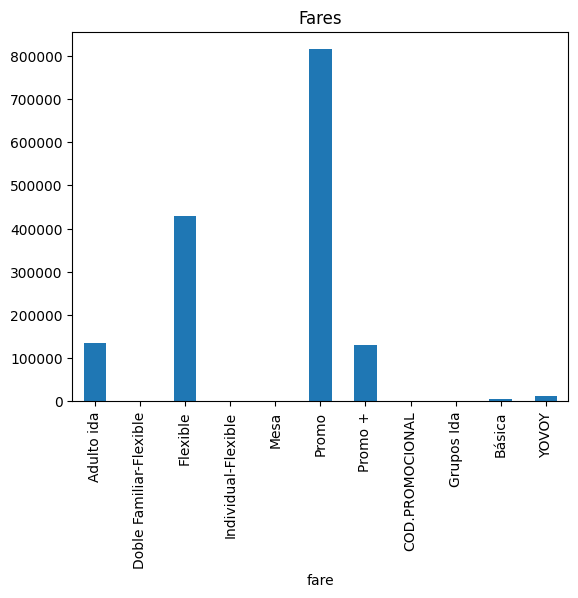

In [17]:
renfe_trips_dask_frame.groupby(['fare']).size().compute().plot(kind='bar', title='Fares')

Most of the tickets had the fare of `Promo` and `Flexible`, as well as `Adulto Ida` and `Promo+`, that are basically plans for tickets - `Promo` being the least expensive and `Flexible` - the most expensive, while `Adulto Ida` - single adult, and `Promo+` being something between `Promo` and `Flexible`. They have their advantages, disadvantages and prices. Therefore, for their encoding, I will first replace all the categories with the lowest number of occurrences, then I will encode them into numerical values.

In [18]:
renfe_trips_dask_frame['fare'] = renfe_trips_dask_frame['fare'].map_partitions(
    lambda part_df: part_df.where(part_df.isin(['Promo', 'Promo+', 'Flexible', 'Adulto ida']), other='Other'),
    meta=('fare', 'object')
)

In [19]:
renfe_trips_dask_frame['fare'].value_counts().compute()

fare
Adulto ida    134556
Promo         814703
Flexible      429672
Other         148363
Name: count, dtype: int64[pyarrow]

<Axes: title={'center': 'Average Price per Vehicle Type'}, ylabel='vehicle_type'>

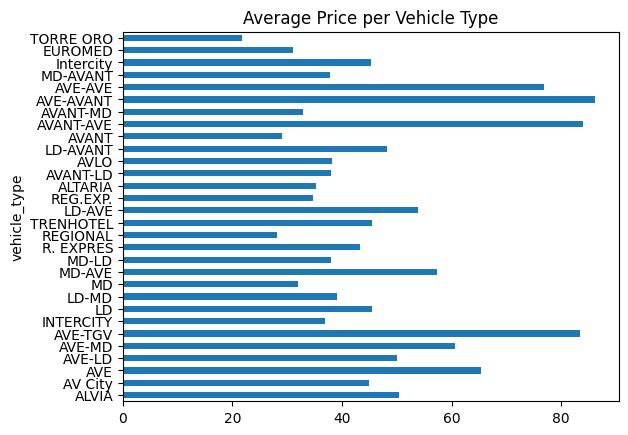

In [20]:
renfe_trips_dask_frame.groupby(['vehicle_type'])['price'].mean().compute().plot(kind='barh', title='Average Price per Vehicle Type')

<Axes: title={'center': 'Fares'}, xlabel='vehicle_type'>

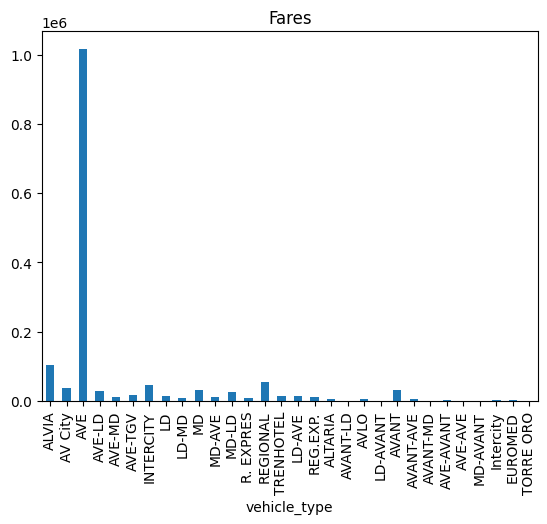

In [21]:
renfe_trips_dask_frame.groupby(['vehicle_type']).size().compute().plot(kind='bar', title='Fares')

In [22]:
vehicle_type_avg_price = renfe_trips_dask_frame.groupby(['vehicle_type'])['price'].mean().compute().sort_values(ascending=False)

In [23]:
vehicle_type_avg_price = list(vehicle_type_avg_price.index)
vehicle_type_avg_price.reverse()

In [24]:
vehicle_type_avg_price

['TORRE ORO',
 'REGIONAL',
 'AVANT',
 'EUROMED',
 'MD',
 'AVANT-MD',
 'REG.EXP.',
 'ALTARIA',
 'INTERCITY',
 'MD-AVANT',
 'AVANT-LD',
 'MD-LD',
 'AVLO',
 'LD-MD',
 'R. EXPRES',
 'AV City',
 'Intercity',
 'LD',
 'TRENHOTEL',
 'LD-AVANT',
 'AVE-LD',
 'ALVIA',
 'LD-AVE',
 'MD-AVE',
 'AVE-MD',
 'AVE',
 'AVE-AVE',
 'AVE-TGV',
 'AVANT-AVE',
 'AVE-AVANT']

<Axes: title={'center': 'Vehicle Classes'}, xlabel='vehicle_class'>

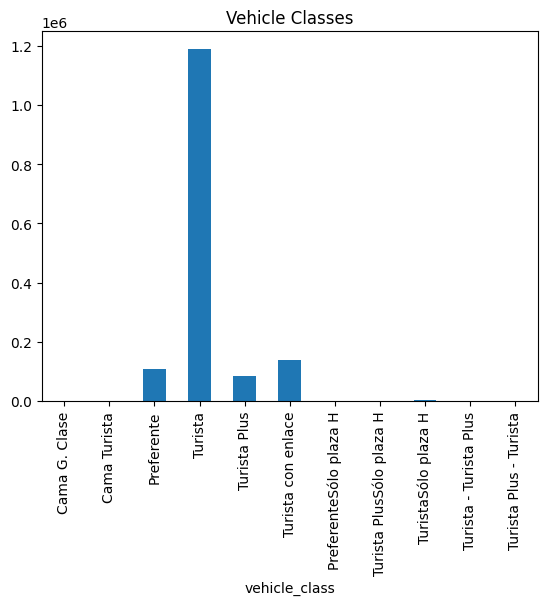

In [25]:
renfe_trips_dask_frame.groupby(['vehicle_class']).size().compute().plot(kind='bar', title='Vehicle Classes')

In [26]:
renfe_trips_dask_frame['vehicle_class'] = renfe_trips_dask_frame['vehicle_class'].map_partitions(
    lambda part_df: part_df.where(part_df.isin(['Turista', 'Turista Plus', 'Preferente', 'Turista con enlace']), other='Other'),
    meta=('vehicle_class', 'object')
)

In [27]:
renfe_trips_dask_frame['vehicle_class'].value_counts().compute()

vehicle_class
Turista con enlace     139081
Preferente             108133
Turista               1189008
Turista Plus            84774
Other                    6298
Name: count, dtype: int64[pyarrow]

In [28]:
null_seats = renfe_trips_dask_frame['seats'].isnull().sum().compute()
print(f'Null Values: {null_seats}\nPercentage: {null_seats/renfe_trips_dask_frame['seats'].shape[0]}')

Null Values: 1463157
Percentage: 0.9580061206290341


In [29]:
renfe_trips_dask_frame = renfe_trips_dask_frame.drop(columns=['seats'])

In [30]:
origin_avg_price = renfe_trips_dask_frame.groupby(['origin'])['price'].mean().compute().sort_values(ascending=False)

In [31]:
origin_avg_price

origin
GIRONA         90.526689
BARCELONA      82.691645
MALAGA         68.773751
TARRAGONA      67.211752
CASTELLO       66.722087
LLEIDA         64.608868
CADIZ          61.722996
MADRID         58.918116
MÁLAGA         58.043854
SEVILLA        57.608770
GRANADA        56.804893
CORDOBA        55.922670
ALICANTE       48.964823
CÓRDOBA        48.316110
HUESCA         47.315942
ZARAGOZA       45.604959
CASTELLON      44.133088
PONFERRADA     43.231837
VALENCIA       40.635158
LEON           37.360438
LEÓN           35.573205
VALLADOLID     32.425389
ALBACETE       32.228353
CIUDAD REAL    31.294531
PALENCIA       29.878323
ZAMORA         25.100000
CUENCA         24.963528
SEGOVIA        18.094066
GUADALAJARA    14.119925
TOLEDO         13.900000
Name: price, dtype: float64

In [32]:
destination_avg_price = renfe_trips_dask_frame.groupby(['destination'])['price'].mean().compute().sort_values(ascending=False)

In [33]:
destination_avg_price

destination
GIRONA         93.319397
BARCELONA      83.054355
MALAGA         68.794182
TARRAGONA      67.239848
CASTELLO       66.050727
LLEIDA         64.755125
CADIZ          63.527141
SEVILLA        59.173570
MADRID         57.929529
CORDOBA        56.969280
GRANADA        55.971970
MÁLAGA         55.759135
ALICANTE       49.068042
CÓRDOBA        48.651555
HUESCA         48.400245
ZARAGOZA       46.070960
PONFERRADA     44.236087
CASTELLON      43.871662
VALENCIA       41.316838
LEON           36.730842
LEÓN           34.232219
ALBACETE       32.577630
VALLADOLID     32.002529
CIUDAD REAL    31.705729
PALENCIA       29.262590
ZAMORA         27.988615
CUENCA         24.481481
SEGOVIA        18.218805
TOLEDO         13.900000
GUADALAJARA    13.591294
Name: price, dtype: float64

In [34]:
renfe_trips_dask_frame.head(n=10)

,origin,destination,duration,vehicle_type,vehicle_class,price,fare
491198,MADRID,BARCELONA,2.50,AVE,Turista,66.75,Promo
501715,BARCELONA,MADRID,2.60,AVE,Turista,85.10,Promo
440928,SEVILLA,MADRID,2.53,AVE,Turista,76.30,Flexible
233485,MADRID,VALENCIA,1.70,AVE,Preferente,43.75,Promo
245096,MADRID,BARCELONA,2.75,AVE,Turista,85.10,Promo
417110,MADRID,BARCELONA,3.17,AVE,Turista Plus,80.15,Promo
112790,MADRID,SEVILLA,2.53,AVE,Turista,76.30,Flexible
393939,SEVILLA,MADRID,2.87,AV City,Turista,43.55,Promo
130184,BARCELONA,MADRID,2.50,AVE,Turista Plus,120.50,Promo
414198,BARCELONA,MADRID,2.75,AVE,Turista,107.70,Flexible


## Encoders Initialization
In order to handle various categorical columns, I decided to use several approaches. Since there is a significant number of categories in `vehicle_class` and `Fare`, I decided to take the categories that persists across the main portion of the dataset, and include remaining categories into a unique category - `Other`. At the same time, since there are a lot of categories in `vehicle_type`, `origin` and `destination`, I decided to use Ordinal Encoder, with the custom order - specifically, I took the descending order by mean value of the price of the tickets grouped by mentioned columns categories.

In [35]:
one_hot_encoder: OneHotEncoder = OneHotEncoder(drop='first', sparse_output=False)

In [36]:
ordinal_encoder: OrdinalEncoder = OrdinalEncoder(categories=[vehicle_type_avg_price,
                                                             origin_avg_price,
                                                             destination_avg_price],
                                                 handle_unknown='use_encoded_value',
                                                 unknown_value=-1)

## Imputer Initialization

In [37]:
imputer = SimpleImputer(strategy="most_frequent")

## Train Test Split

In [38]:
X_features = renfe_trips_dask_frame.drop(columns=['price'])

In [39]:
y_target = renfe_trips_dask_frame['price']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42, shuffle=True)

In [41]:
X_train.head(n=5)

,origin,destination,duration,vehicle_type,vehicle_class,fare
395246,SEVILLA,MADRID,2.50,AVE,Turista,Flexible
161683,SEVILLA,MADRID,2.50,AVE,Turista,Promo
168260,MADRID,SEVILLA,2.53,AVE,Turista,Promo
179923,MADRID,VALENCIA,1.67,AVE,Turista,Promo
154787,MADRID,VALENCIA,1.88,AVE,Turista,Promo


In [42]:
categorical_columns = [i for i in X_features.columns if X_features[i].dtype == 'string']

In [43]:
X_train_cat = X_train.categorize(columns=categorical_columns)

In [44]:
X_test_cat = X_test.categorize(columns=categorical_columns)

In [45]:
X_train_dum_cat = dd.get_dummies(X_train_cat, columns=categorical_columns)

In [46]:
X_test_dum_cat = dd.get_dummies(X_test_cat, columns=categorical_columns)

In [47]:
X_train_final = X_train_dum_cat.to_dask_array(lengths=True)

In [48]:
X_test_final = X_test_dum_cat.to_dask_array(lengths=True)

In [49]:
y_train_final = y_train.to_dask_array(lengths=True)

In [50]:
y_test_final = y_test.to_dask_array(lengths=True)

IF OTHER WAY of ENCODING AND IMPUTING, GO BELOW, OTHERWISE - JUMP TO TRAIN

## Imputation

In [51]:
X_train = imputer.fit_transform(X=X_train, y=y_train)

In [52]:
X_test = imputer.transform(X=X_test)

In [53]:
X_train.head(n=5)

,origin,destination,duration,vehicle_type,vehicle_class,fare
395246,SEVILLA,MADRID,2.50,AVE,Turista,Flexible
161683,SEVILLA,MADRID,2.50,AVE,Turista,Promo
168260,MADRID,SEVILLA,2.53,AVE,Turista,Promo
179923,MADRID,VALENCIA,1.67,AVE,Turista,Promo
154787,MADRID,VALENCIA,1.88,AVE,Turista,Promo


In [54]:
X_test.head(n=5)

,origin,destination,duration,vehicle_type,vehicle_class,fare
408611,MADRID,BARCELONA,2.50,AVE,Turista,Promo
348747,MADRID,VALENCIA,1.67,AVE,Preferente,Promo
495359,MADRID,BARCELONA,3.07,AVE,Preferente,Promo
330990,MADRID,SEVILLA,2.70,INTERCITY,Turista,Flexible
39674,MADRID,VALENCIA,1.88,AVE,Turista,Promo


In [55]:
print(X_train.isnull().sum().compute())

origin           0
destination      0
duration         0
vehicle_type     0
vehicle_class    0
fare             0
dtype: int64


In [56]:
print(X_test.isnull().sum().compute())

origin           0
destination      0
duration         0
vehicle_type     0
vehicle_class    0
fare             0
dtype: int64


## Encoding

In [57]:
# one_hot_encoder_cols = ["fare", "vehicle_class"]
# ordinal_encoder_cols = ["vehicle_type", "origin", "destination"]

one_hot_encoder_cols = ["fare", "vehicle_class", "vehicle_type", "origin", "destination"]

In [58]:
X_train = X_train.compute()

In [59]:
X_test = X_test.compute()

In [60]:
y_train = y_train.compute()

In [61]:
y_test = y_test.compute()

In [62]:
X_train

,origin,destination,duration,vehicle_type,vehicle_class,fare
395246,SEVILLA,MADRID,2.50,AVE,Turista,Flexible
161683,SEVILLA,MADRID,2.50,AVE,Turista,Promo
168260,MADRID,SEVILLA,2.53,AVE,Turista,Promo
179923,MADRID,VALENCIA,1.67,AVE,Turista,Promo
154787,MADRID,VALENCIA,1.88,AVE,Turista,Promo
...,...,...,...,...,...,...
78632,CORDOBA,MADRID,2.33,Intercity,Turista,Flexible
119574,ZARAGOZA,MADRID,1.45,AVE,Turista,Other
156086,MADRID,ALICANTE,2.58,AVE,Turista,Other
117514,MALAGA,MADRID,2.63,AVE,Turista,Flexible


In [63]:
X_train_ohe = one_hot_encoder.fit_transform(X=X_train[one_hot_encoder_cols], y=y_train)

In [64]:
X_train_ohe

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.]], shape=(1222313, 94))

In [65]:
X_train_ohe_df = pd.DataFrame(
    X_train_ohe,
    columns=one_hot_encoder.get_feature_names_out(one_hot_encoder_cols),
    index=X_train.index
)

In [66]:
X_train_ohe_df

,fare_Flexible,fare_Other,fare_Promo,vehicle_class_Preferente,vehicle_class_Turista,vehicle_class_Turista Plus,vehicle_class_Turista con enlace,vehicle_type_ALVIA,vehicle_type_AV City,vehicle_type_AVANT,...,destination_PALENCIA,destination_PONFERRADA,destination_SEGOVIA,destination_SEVILLA,destination_TARRAGONA,destination_TOLEDO,destination_VALENCIA,destination_VALLADOLID,destination_ZAMORA,destination_ZARAGOZA
395246,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161683,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168260,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
179923,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
154787,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78632,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119574,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156086,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117514,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
X_train_dropped = X_train.drop(columns=one_hot_encoder_cols)

In [68]:
X_train_dropped

,duration
395246,2.50
161683,2.50
168260,2.53
179923,1.67
154787,1.88
...,...
78632,2.33
119574,1.45
156086,2.58
117514,2.63


In [69]:
X_train_ohe_df_final = pd.concat([X_train_dropped, X_train_ohe_df], axis=1)

In [70]:
X_train_ohe_df_final

,duration,fare_Flexible,fare_Other,fare_Promo,vehicle_class_Preferente,vehicle_class_Turista,vehicle_class_Turista Plus,vehicle_class_Turista con enlace,vehicle_type_ALVIA,vehicle_type_AV City,...,destination_PALENCIA,destination_PONFERRADA,destination_SEGOVIA,destination_SEVILLA,destination_TARRAGONA,destination_TOLEDO,destination_VALENCIA,destination_VALLADOLID,destination_ZAMORA,destination_ZARAGOZA
395246,2.50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161683,2.50,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168260,2.53,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
179923,1.67,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
154787,1.88,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78632,2.33,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119574,1.45,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156086,2.58,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117514,2.63,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
X_test_ohe = one_hot_encoder.transform(X=X_test[one_hot_encoder_cols])

In [72]:
X_test_ohe

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], shape=(304981, 94))

In [73]:
X_test_ohe_df = pd.DataFrame(
    X_test_ohe,
    columns=one_hot_encoder.get_feature_names_out(one_hot_encoder_cols),
    index=X_test.index
)

In [74]:
X_test_ohe_df

,fare_Flexible,fare_Other,fare_Promo,vehicle_class_Preferente,vehicle_class_Turista,vehicle_class_Turista Plus,vehicle_class_Turista con enlace,vehicle_type_ALVIA,vehicle_type_AV City,vehicle_type_AVANT,...,destination_PALENCIA,destination_PONFERRADA,destination_SEGOVIA,destination_SEVILLA,destination_TARRAGONA,destination_TOLEDO,destination_VALENCIA,destination_VALLADOLID,destination_ZAMORA,destination_ZARAGOZA
408611,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348747,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
495359,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
330990,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39674,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219794,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107086,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64610,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
231647,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
X_test_dropped = X_test.drop(columns=one_hot_encoder_cols)

In [76]:
X_test_ohe_df_final = pd.concat([X_test_dropped, X_test_ohe_df], axis=1)

In [77]:
X_test_ohe_df_final

,duration,fare_Flexible,fare_Other,fare_Promo,vehicle_class_Preferente,vehicle_class_Turista,vehicle_class_Turista Plus,vehicle_class_Turista con enlace,vehicle_type_ALVIA,vehicle_type_AV City,...,destination_PALENCIA,destination_PONFERRADA,destination_SEGOVIA,destination_SEVILLA,destination_TARRAGONA,destination_TOLEDO,destination_VALENCIA,destination_VALLADOLID,destination_ZAMORA,destination_ZARAGOZA
408611,2.50,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348747,1.67,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
495359,3.07,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
330990,2.70,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39674,1.88,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219794,2.68,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107086,4.67,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64610,3.17,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
231647,2.60,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
# X_train_enc = ordinal_encoder.fit_transform(X=X_train_ohe_df_final[ordinal_encoder_cols], y=y_train)

In [79]:
# X_train_enc

In [80]:
# X_train_enc_df = pd.DataFrame(
#     X_train_enc,
#     columns=ordinal_encoder.get_feature_names_out(ordinal_encoder_cols),
#     index=X_train_ohe_df_final.index
# )

In [81]:
# X_train_enc_df

In [82]:
# X_train_dropped = X_train_ohe_df_final.drop(columns=ordinal_encoder_cols)

In [83]:
# X_train_dropped

In [84]:
# X_train_enc_df_final = pd.concat([X_train_dropped, X_train_enc_df], axis=1)

In [85]:
# X_train_enc_df_final

In [86]:
# X_test_enc = ordinal_encoder.transform(X=X_test_ohe_df_final[ordinal_encoder_cols])

In [87]:
# X_test_enc

In [88]:
# X_test_enc_df = pd.DataFrame(
#     X_test_enc,
#     columns=ordinal_encoder.get_feature_names_out(ordinal_encoder_cols),
#     index=X_test_ohe_df_final.index
# )

In [89]:
# X_test_enc_df

In [90]:
# X_test_dropped = X_test_ohe_df_final.drop(columns=ordinal_encoder_cols)

In [91]:
# X_test_dropped

In [92]:
# X_test_enc_df_final = pd.concat([X_test_dropped, X_test_enc_df], axis=1)

In [93]:
# X_test_enc_df_final

In [94]:
# X_train = dd.from_pandas(data=X_train, npartitions=5)

In [95]:
# X_test = dd.from_pandas(data=X_test, npartitions=5)

In [96]:
# X_train.head(n=5)

In [97]:
# X_test.head(n=5)

## Model Training

In [98]:
random_forest_regressor = LinearRegression()

In [99]:
X_train_ohe_df_final.head(n=5)

,duration,fare_Flexible,fare_Other,fare_Promo,vehicle_class_Preferente,vehicle_class_Turista,vehicle_class_Turista Plus,vehicle_class_Turista con enlace,vehicle_type_ALVIA,vehicle_type_AV City,...,destination_PALENCIA,destination_PONFERRADA,destination_SEGOVIA,destination_SEVILLA,destination_TARRAGONA,destination_TOLEDO,destination_VALENCIA,destination_VALLADOLID,destination_ZAMORA,destination_ZARAGOZA
395246,2.50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161683,2.50,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168260,2.53,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
179923,1.67,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
154787,1.88,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [100]:
random_forest_regressor.fit(X=X_train_ohe_df_final, y=y_train)
# random_forest_regressor.fit(X=X_train_final, y=y_train)

LinearRegression()

In [101]:
y_hat = random_forest_regressor.predict(X=X_test_ohe_df_final)
# y_hat = random_forest_regressor.predict(X=X_test_final)

In [102]:
accuracy = random_forest_regressor.score(X=X_test_ohe_df_final, y=y_test)

In [103]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.8349548171738084


In [104]:
mse = mean_squared_error(y_true=y_test, y_pred=y_hat)
mae = mean_absolute_error(y_true=y_test, y_pred=y_hat)
rmse = root_mean_squared_error(y_true=y_test, y_pred=y_hat)

In [105]:
print(f'MSE: {mse}\nMAE: {mae}\nRMSE: {rmse}')

MSE: 101.03603427902846
MAE: 6.888636130614928
RMSE: 10.051668233633084
